📊 EMG Summary Statistics by Exoskeleton Usage:
           count      mean       std       min      25%       50%       75%  \
exo                                                                          
False  124040.0  0.008091  0.109676 -2.737453 -0.01091  0.005203  0.035278   
True   128648.0  0.006452  0.097273 -2.355596 -0.00858  0.004137  0.033994   

            max  
exo              
False  2.173815  
True   0.957916  


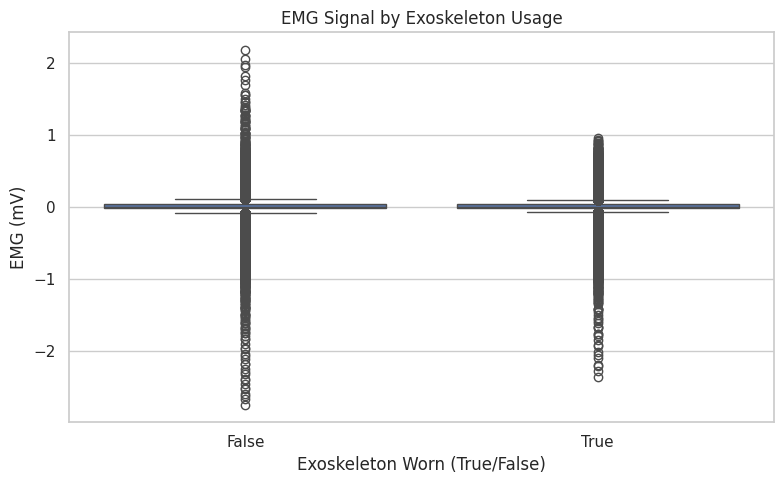

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")\

emg_by_exo = df.groupby('exo')['EMG_MilliVolts'].describe()
print("EMG Summary Statistics by Exoskeleton Usage:\n", emg_by_exo)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='exo', y='EMG_MilliVolts')
plt.title('EMG Signal by Exoskeleton Usage')
plt.xlabel('Exoskeleton Worn (True/False)')
plt.ylabel('EMG (mV)')
plt.tight_layout()
plt.show()


📊 Average Acceleration by BodyPart:
           ACC X (G)  ACC Y (G)  ACC Z (G)
BodyPart                                 
LBicep     0.390542   0.591595   0.181948
LDelt     -0.351684   0.575916   0.370782
RBicep    -0.461295   0.506193   0.267554
RDelt      0.194764   0.598909   0.431658


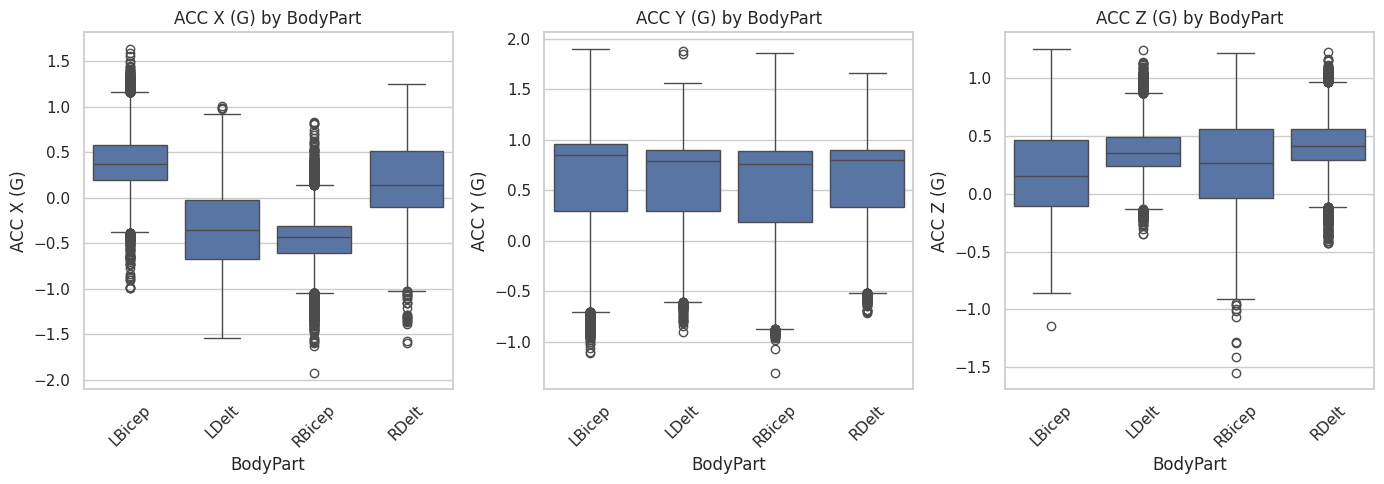

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

acc_means = df.groupby('BodyPart')[['ACC X (G)', 'ACC Y (G)', 'ACC Z (G)']].mean()
print("Average Acceleration by BodyPart:\n", acc_means)

plt.figure(figsize=(14, 5))
for i, axis in enumerate(['ACC X (G)', 'ACC Y (G)', 'ACC Z (G)']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x='BodyPart', y=axis)
    plt.xticks(rotation=45)
    plt.title(f'{axis} by BodyPart')
    plt.tight_layout()

plt.show()


📊 EMG Summary by Gender:
            count      mean       std       min       25%       50%       75%  \
gender                                                                         
female  131904.0  0.007724  0.070067 -1.784070 -0.008185  0.004789  0.031506   
male    120784.0  0.006746  0.130655 -2.737453 -0.011285  0.004453  0.036739   

             max  
gender            
female  1.082124  
male    2.173815  

📊 EMG Summary by Run Number:
             count      mean       std       min       25%       50%       75%  \
run_num                                                                         
1        119928.0  0.008557  0.114974 -2.737453 -0.011819  0.004887  0.037038   
2        132760.0  0.006082  0.092004 -2.355596 -0.008304  0.004502  0.032415   

              max  
run_num            
1        2.173815  
2        1.082124  


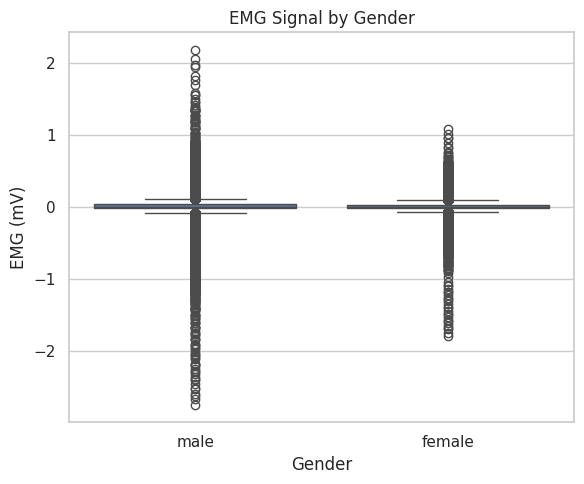

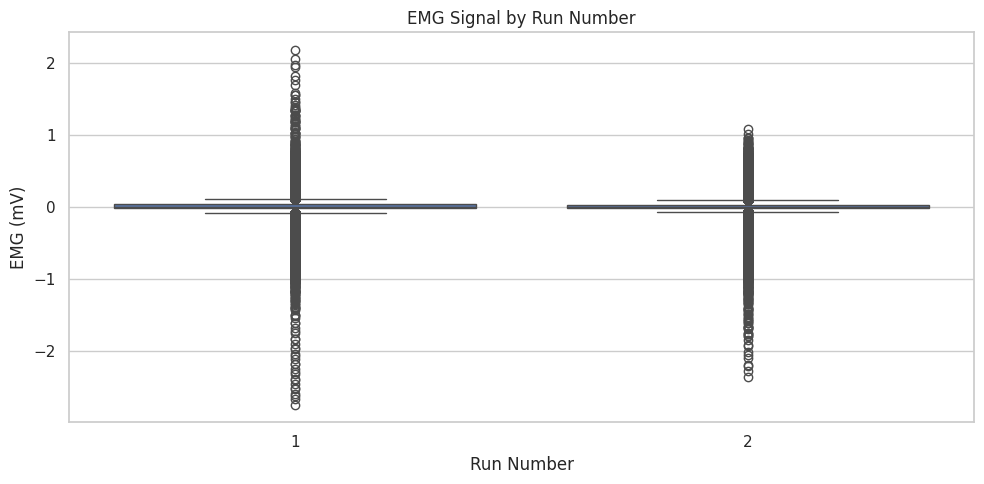

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

emg_by_gender = df.groupby('gender')['EMG_MilliVolts'].describe()
print("EMG Summary by Gender:\n", emg_by_gender)

emg_by_run = df.groupby('run_num')['EMG_MilliVolts'].describe()
print("\nEMG Summary by Run Number:\n", emg_by_run)

plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='gender', y='EMG_MilliVolts')
plt.title('EMG Signal by Gender')
plt.xlabel('Gender')
plt.ylabel('EMG (mV)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='run_num', y='EMG_MilliVolts')
plt.title('EMG Signal by Run Number')
plt.xlabel('Run Number')
plt.ylabel('EMG (mV)')
plt.tight_layout()
plt.show()


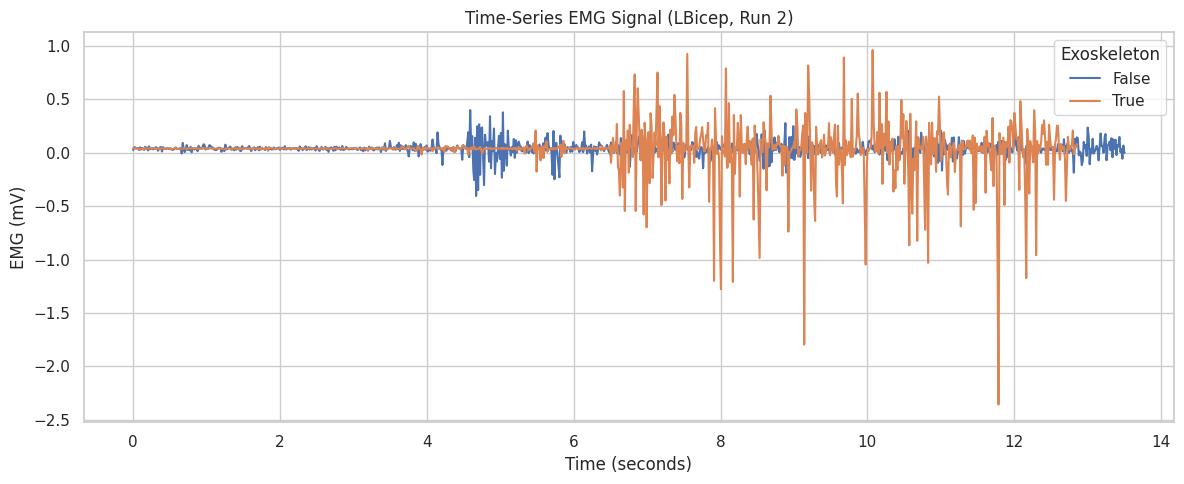

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['time_sec'] = pd.to_timedelta(df['time']).dt.total_seconds()

subject_df = df[(df['run_num'] == 2) & (df['BodyPart'] == 'LBicep')].copy()

plt.figure(figsize=(12, 5))
sns.lineplot(data=subject_df, x='time_sec', y='EMG_MilliVolts', hue='exo')
plt.title('Time-Series EMG Signal (LBicep, Run 2)')
plt.xlabel('Time (seconds)')
plt.ylabel('EMG (mV)')
plt.legend(title='Exoskeleton')
plt.tight_layout()
plt.show()


📊 Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.89      0.88     37332
        True       0.89      0.87      0.88     38475

    accuracy                           0.88     75807
   macro avg       0.88      0.88      0.88     75807
weighted avg       0.88      0.88      0.88     75807

📊 Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.53      0.65      0.59     37332
        True       0.57      0.45      0.50     38475

    accuracy                           0.55     75807
   macro avg       0.55      0.55      0.54     75807
weighted avg       0.55      0.55      0.54     75807



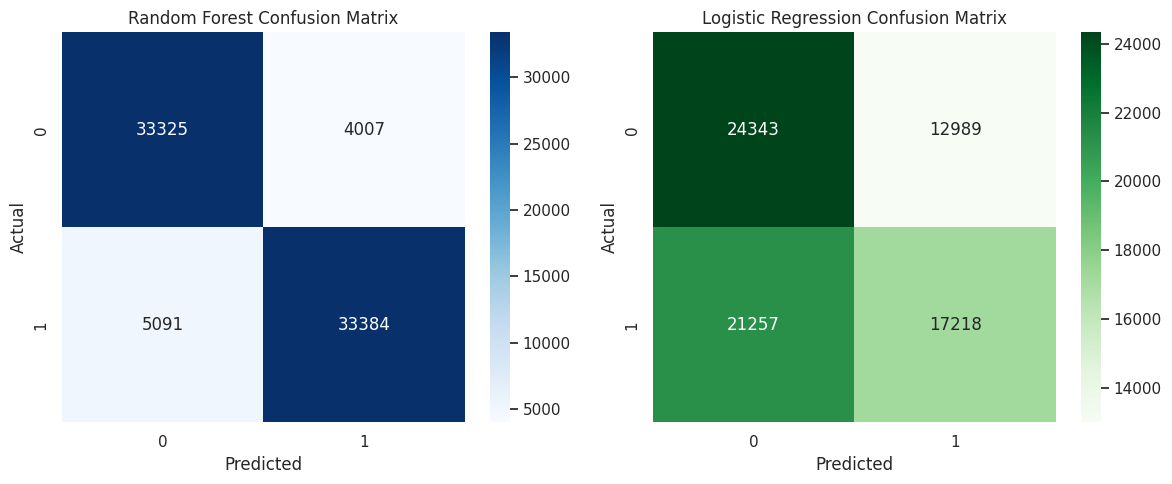

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

features = ['EMG_MilliVolts', 'ACC X (G)', 'ACC Y (G)', 'ACC Z (G)',
            'GYRO X (deg/s)', 'GYRO Y (deg/s)', 'GYRO Z (deg/s)']
X = df[features]
y = df['exo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000)

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [23]:
import numpy as np

df['time_sec'] = pd.to_timedelta(df['time']).dt.total_seconds()
df = df.sort_values(by=['run_num', 'BodyPart', 'time_sec'])

df['EMG_RMS'] = df.groupby(['run_num', 'BodyPart'])['EMG_MilliVolts'].transform(
    lambda x: x.rolling(window=20, min_periods=1).apply(lambda s: np.sqrt(np.mean(s**2)))
)

df['ACC_Mag'] = np.sqrt(df['ACC X (G)']**2 + df['ACC Y (G)']**2 + df['ACC Z (G)']**2)

gyro_diff = df.groupby(['run_num', 'BodyPart'])[['GYRO X (deg/s)', 'GYRO Y (deg/s)', 'GYRO Z (deg/s)']].diff()
df['GYRO_Change'] = np.sqrt((gyro_diff**2).sum(axis=1))

df['ACC_Mag_Mean'] = df.groupby(['run_num', 'BodyPart'])['ACC_Mag'].transform(
    lambda x: x.rolling(window=20, min_periods=1).mean()
)
df['ACC_Mag_Std'] = df.groupby(['run_num', 'BodyPart'])['ACC_Mag'].transform(
    lambda x: x.rolling(window=20, min_periods=1).std()
)

df[['EMG_MilliVolts', 'EMG_RMS', 'ACC_Mag', 'GYRO_Change', 'ACC_Mag_Mean', 'ACC_Mag_Std']].head(10)


,EMG_MilliVolts,EMG_RMS,ACC_Mag,GYRO_Change,ACC_Mag_Mean,ACC_Mag_Std
64752,0.032898,0.032898,0.960102,0.000000,0.960102,NaN
120784,0.037766,0.035416,0.986214,12.625040,0.973158,0.018464
64756,0.033353,0.034742,0.963415,13.053504,0.969910,0.014216
120788,0.037588,0.035475,0.993374,12.874715,0.975776,0.016503
64760,0.033807,0.035148,0.967969,13.031749,0.974215,0.014713
120792,0.037411,0.035535,0.996212,13.379295,0.977881,0.015932
64764,0.034261,0.035356,0.967765,13.844180,0.976436,0.015038
120796,0.037233,0.035596,0.991405,13.410155,0.978307,0.014894
64768,0.034715,0.035499,0.971014,14.021653,0.977497,0.014143
120800,0.037055,0.035658,0.977748,14.191537,0.977522,0.013334


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

feature_cols = [
    'EMG_RMS', 'ACC_Mag', 'GYRO_Change', 'ACC_Mag_Mean', 'ACC_Mag_Std'
]

df_model = df[feature_cols + ['exo']].dropna()

X = df_model[feature_cols]
y = df_model['exo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000)

rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

report_rf, report_lr


({'False': {'precision': 0.5506409745998885,
   'recall': 0.556646677667324,
   'f1-score': 0.5536275392774942,
   'support': 24847.0},
  'True': {'precision': 0.5666063419623889,
   'recall': 0.5606290630230838,
   'f1-score': 0.5636018549318097,
   'support': 25689.0},
  'accuracy': 0.5586710463827766,
  'macro avg': {'precision': 0.5586236582811387,
   'recall': 0.558637870345204,
   'f1-score': 0.558614697104652,
   'support': 50536.0},
  'weighted avg': {'precision': 0.5587566608864025,
   'recall': 0.5586710463827766,
   'f1-score': 0.5586977900857044,
   'support': 50536.0}},
 {'False': {'precision': 0.5043293219841503,
   'recall': 0.27661287076910696,
   'f1-score': 0.357270955165692,
   'support': 24847.0},
  'True': {'precision': 0.5130053105017882,
   'recall': 0.737046985090895,
   'f1-score': 0.6049491189673627,
   'support': 25689.0},
  'accuracy': 0.5106656640810512,
  'macro avg': {'precision': 0.5086673162429692,
   'recall': 0.5068299279300009,
   'f1-score': 0.48111

In [25]:
# Define feature columns (raw + engineered)
combined_features = [
    'EMG_MilliVolts', 'ACC X (G)', 'ACC Y (G)', 'ACC Z (G)',
    'GYRO X (deg/s)', 'GYRO Y (deg/s)', 'GYRO Z (deg/s)',
    'EMG_RMS', 'ACC_Mag', 'GYRO_Change', 'ACC_Mag_Mean', 'ACC_Mag_Std'
]

# Drop rows with NaNs (due to rolling calculations)
df_combined = df[combined_features + ['exo']].dropna()

# Sample subset for manageable memory usage
df_sampled_combined = df_combined.sample(n=30000, random_state=42)

X = df_sampled_combined[combined_features]
y = df_sampled_combined['exo']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000)

rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# Evaluation
report_rf_combined = classification_report(y_test, y_pred_rf, output_dict=True)
report_lr_combined = classification_report(y_test, y_pred_lr, output_dict=True)

report_rf_combined, report_lr_combined


({'False': {'precision': 0.8055737704918032,
   'recall': 0.8385665529010239,
   'f1-score': 0.8217391304347826,
   'support': 2930.0},
  'True': {'precision': 0.8396610169491525,
   'recall': 0.8068403908794788,
   'f1-score': 0.8229235880398671,
   'support': 3070.0},
  'accuracy': 0.8223333333333334,
  'macro avg': {'precision': 0.8226173937204779,
   'recall': 0.8227034718902513,
   'f1-score': 0.8223313592373249,
   'support': 6000.0},
  'weighted avg': {'precision': 0.8230150782624802,
   'recall': 0.8223333333333334,
   'f1-score': 0.8223451779093842,
   'support': 6000.0}},
 {'False': {'precision': 0.5458039718129404,
   'recall': 0.5815699658703072,
   'f1-score': 0.5631196298744217,
   'support': 2930.0},
  'True': {'precision': 0.5740097289784573,
   'recall': 0.5381107491856677,
   'f1-score': 0.5554808338937458,
   'support': 3070.0},
  'accuracy': 0.5593333333333333,
  'macro avg': {'precision': 0.5599068503956988,
   'recall': 0.5598403575279874,
   'f1-score': 0.5593002

In [26]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Use a smaller dataset for speed/memory efficiency during GridSearch
df_sampled_grid = df_combined.sample(n=10000, random_state=42)

X_grid = df_sampled_grid[combined_features]
y_grid = df_sampled_grid['exo']

# Set up GridSearch with 3-fold cross-validation
rf_base = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Perform grid search
grid_search.fit(X_grid, y_grid)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 3 folds for each of 72 candidates, totalling 216 fits


({'criterion': 'entropy',
  'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'n_estimators': 100},
 np.float64(0.7575001351364891))